In [67]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import os
import seaborn as sns

In [68]:
from preprocessing import preprocess
import os
# Define the path to the directory with the CSV files
input_dir = 'seeds\\seed3'
output_dir = 'processed_results'

# Check if output directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Define the scenario
data = [
    [(8, 55), (12, 80), (16, 40), (18, 50), (23, 75)]
,[(7, 80), (11, 75), (15, 20), (18, 35), (22, 25)]
,[(8, 45), (12, 30), (14, 90), (18, 50), (22, 45)]
,[(7, 55), (11, 80), (15, 45), (17, 60), (22, 35)]
,[(7, 60), (12, 90), (16, 65), (18, 20), (22, 30)]
,[(8, 65), (11, 75), (15, 35), (18, 45), (22, 25)]
,[(7, 20), (12, 80), (15, 30), (18, 75), (22, 60)]
,[(8, 50), (12, 70), (14, 35), (18, 80), (22, 30)]
,[(7, 40), (11, 65), (15, 50), (18, 95), (22, 45)]
,[(7, 25), (12, 80), (14, 35), (18, 45), (22, 95)]
]

# Loop over all CSV files
for iter, file_name in enumerate(csv_files, start=1):
    #print(data[iter-1])
    file_path = os.path.join(input_dir, file_name)
    scen = data[iter-1]
    # Call the preprocessing function
    preprocess(file_path, scen, iter, output_dir)

In [69]:
import pandas as pd
import os

# Define the path to the directory with the CSV files
input_dir = 'processed_results'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop over all CSV files
for file_name in csv_files:
    # Define the file path
    file_path = os.path.join(input_dir, file_name)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [70]:
#df = pd.read_csv('E:\\Projects\\Unfinished\\Insulin Project\\results2\\adolescent#001_processed.csv')
df.drop(['Time', 'Date'], axis=1, inplace=True)
df.dropna(inplace=True)
df

,CGM,insulin,Meal,Prediction
0,161.643949,0.013117,0,157.432022
1,157.432022,0.013117,0,155.089373
2,155.089373,0.013117,0,153.322710
3,153.322710,0.013117,0,151.958950
4,151.958950,0.013117,0,150.825014
...,...,...,...,...
14424,141.693157,0.013117,0,140.700577
14425,140.700577,0.013117,0,139.741977
14426,139.741977,0.013117,0,138.943963
14427,138.943963,0.013117,0,138.415138


In [71]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the input features and the target variable
X = df[['CGM', 'Meal', 'insulin']].values
y = df['Prediction'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Convert the data into PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [73]:
X_train[0].shape

torch.Size([3])

In [74]:
# Create the ANN model
model = nn.Sequential(
    nn.Linear(3, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    loss.backward()
    optimizer.step()

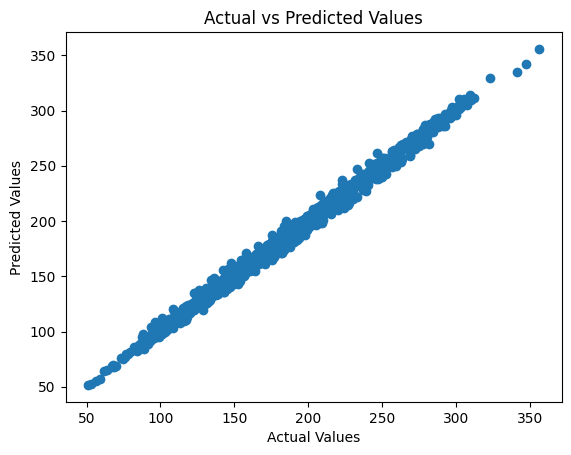

In [75]:
import matplotlib.pyplot as plt

# Switch to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred_test = model(X_test)

# Convert tensors to numpy arrays for plotting
y_test_np = y_test.numpy()
y_pred_test_np = y_pred_test.numpy().squeeze()

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_np, y_pred_test_np)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [76]:
# Switch to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred_test = model(X_test)

# Compute the loss on the test set
test_loss = criterion(y_pred_test.squeeze(), y_test)

# Print the test loss
print(f'Test Loss: {test_loss.item()}')

Test Loss: 9.73241901397705


In [77]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, 'model.pth')